# Exercícios: Modelos para PLN
Fonte: CARVALHO, Fabrício Galende Marques de. **Notas de aula da disciplina processamento de linguagem natural.** São José dos Campos, 2023.

#### Atividade realizada em grupo: 
- Gabriel Camargo Leite
- Giovana Thaís de O. Silva
- Isabelle Dias R. Silva
- João Marcos O. Santos
- Maria Gabriela G. S. Reis
- Thiago Henrique Ferreira

## Terminologia e conceitos
---

1.  (TC.3.1) Qual tipo de problema pode surgir na montagem de um modelo do tipo bag of words caso etapas tais como a remoção de caracteres especiais (ex. sinais de pontuação) e conversão para minúsculas/maiúsculas não sejam efetuadas? Ilustre isso para as seguintes frases que fazem parte de um mesmo corpus de texto (i.e.: são usadas para a montagem do léxico do modelo). Na sua resposta mostre como ficaria o léxico do modelo e os bag of words correspondentes:
    - Frase 1: Eu quero tomar água!
    - Frase 2: eu, prefiro tomar café.
    
**Resposta:** Ao montar um modelo do tipo bag of words sem primeiro tratar os dados (removendo caracteres especiais, convertendo a capitalização das palavras, etc) o risco de ruídos aparecerem entre as palavras aumenta drasticamente, assim dificultando as próximas etapas do processo (como aplicação de TF-IDF e classificações), onde muitas palavras iguais são tratadas como diferentes apenas por estarem minúsculas ou maiúsculas, além de pontuações serem concatenadas, como se pode observar nos exemplos abaixo:

| Modelo Léxico |
|:-------------:|
| `['Eu', 'quero', 'tomar', 'água!', 'eu,', 'prefiro', 'café.']` |

| Frase                   | Bag of Words            |
| :---------------------- |:------------------------|
| Eu quero tomar água!    | `[1, 1, 1, 1, 0, 0, 0]` |
| eu, prefiro tomar café. | `[0, 0, 1, 0, 1, 1, 1]` |


2. (TC.3.2) Qual a relação entre as etapas de pré-processamento de texto e a redução de dimensionalidade quando se lida com extração de características? Ilustre isso considerando 2 exemplos que façam uso de stemização e/ou lematização.

**Resposta:** No pré-processamento os ruídos (como caracteres especiais, stopwords, etc.) são removidos e é aplicada a stemização e/ou lematização. A partir do array das palavras pré-processadas, é realizada a extração de características do mesmo. Por exemplo, nas frases “O cão corre na chuva” e “O cão não corre na chuva”:

| LEMATIZAÇÃO                  | STEMMING                  |
| :--------------------------- |:--------------------------|
| `['cao', 'correr', 'chuva']` | `[ 'ca', 'corr', 'chuv']` |
| `[1, 1, 1]`                  | `[1, 1, 1]`               |

Como visto acima, a realização correta do pré-processamento antes da extração de características é muito importante, pois dessa forma os dados numéricos gerados são mais coerentes.


3. (TC.3.3) Descreva como ficaria o léxico do modelo e o vetor de características n-gram para n=1, 2 e 3 para os seguintes documentos pertencentes ao mesmo corpus:
- Frase 1: Eu não gostei do produto e o produto parece ruim.

    
| Modelo Léxico |
|:-------------:|
| `[‘Eu’, ‘não’, ‘gostei’, ‘produto’, ‘parece’, ‘ruim’]` |
    
| Vetor de Características n-gram n=1 | Vetor de Características n-gram n=2 | Vetor de Características n-gram n=3 |
|:------------------------------------|:------------------------------------|:------------------------------------|
| `[‘Eu’, ‘não’, ‘gostei’, ‘produto’, ‘parece’, ‘ruim’]` | `[‘Eu não’, ‘não gostei’, ‘produto produto’, 'produto parece', ‘parece ruim’]` | `[‘Eu não gostei’, ‘não gostei produto’, ‘gostei produto produto’, ‘produto produto parece’, ‘produto parece ruim’]`|
    
- Frase 2: O produto parece bom.

        
| Modelo Léxico |
|:-------------:|
| `[‘produto’, ‘parece’, ‘bom’]` |
    
| Vetor de Características n-gram n=1 | Vetor de Características n-gram n=2 | Vetor de Características n-gram n=3 |
|:------------------------------------|:------------------------------------|:------------------------------------|
| `[‘produto’, ‘parece’, ‘bom’]`      | `[‘produto parece’, ‘parece bom’]`  | `[‘produto parece bom’]`            |
    
- Frase 3: O produto parece ruim.

         
| Modelo Léxico |
|:-------------:|
| `[‘produto’, ‘parece’, ‘ruim’]` |
    
| Vetor de Características n-gram n=1 | Vetor de Características n-gram n=2 | Vetor de Características n-gram n=3 |
|:------------------------------------|:------------------------------------|:------------------------------------|
| `[‘produto’, ‘parece’, ‘ruim’]`     | `[‘produto parece’, ‘parece ruim’]` | `[‘produto parece ruim’]`           |



4. (TC.3.4) Para o exercício TC.3.3, considerando um modelo bag of words, com n=1, mostre como se calcula o valor da transformação TFIDF para as palavras produto e ruim, ambas na frase 1. Utilize as expressões fornecidas no material das aulas de PLN. 

**Resposta:** Partindo da frase 1: "Eu não gostei do produto e o produto parece ruim", temos os seguintes cálculos:


| Modelo Léxico                                                 | Bag of words da frase 1 |
|:-------------------------------------------------------------:|:------------------------|
| `[‘Eu’, ‘não’, ‘gostei’, ‘produto’, ‘parece’, ‘ruim’, 'bom']` |`[1, 1, 1, 1, 1, 1, 0]`  |

- **Cálculos para "produto":**
    - TF(‘produto’):
         > Número de vezes que ‘produto’ aparece na frase = 2 <br> Número de termos na frase = 8 <br> **TF(‘produto’): 2/8 = 0.25**
    - IDF(‘produto’): 
        > Número de documentos = 3 <br> Número de documentos em que o termo aparece: 3 <br> **IDF(‘produto’): log(3/3) = log(1) = 0**
    - TF-IDF(‘produto’) = TF(‘produto’) * IDF(‘produto’) = **0.25 * 0 = 0**
        
        
- **Cálculos para "ruim":**
    - TF(‘ruim’):
         > Número de vezes que ‘produto’ aparece na frase = 1 <br> Número de termos na frase = 8 <br> **TF(‘ruim’): 1/8 = 0.1**
    - IDF(‘ruim’): 
        > Número de documentos = 3 <br> Número de documentos em que o termo aparece: 2 <br> **IDF(‘ruim’): log(3/2) = log(3)/2 = 0.2**
    - TF-IDF(‘ruim’) = TF(‘ruim’) * IDF(‘ruim’) = **0.1 * 0.2 = 0.02**

Dados os cálculos acima, o valor da transformação TFIDF para "produto" e "ruim" seriam, respectivamente e aproximadamente, 0 e 0.02.

## Prática de programação
---

1. (PP.3.1)  Baseando-se nos exemplos fornecidos pelo professor, que fazem uso da biblioteca scikit-learn, ilustre a obtenção de um vetor do tipo bag of words com transformação do tipo TFIDF para dois documentos que representem reviews de produtos em um site de e-commerce. Execute todas as etapas de pré-processamento necessárias para normalizar os dados. 

In [1]:
!python -m spacy download pt

⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 46.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [2]:
import pandas as pd
import spacy
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer

nlp = spacy.load("pt_core_news_sm", disable=['parser', 'ner'])
stemmer = nltk.stem.RSLPStemmer()

def remove_stopwords(text):
    # Remove stopwords
    stop_words = [word for word in nlp.Defaults.stop_words]
    cleaned_text = " ".join([i for i in text if i not in set(stop_words)])
    return cleaned_text
    
def clean_text(text):
    # Aplica a remoção de stopwords, caracteres não alfabéticos e outras palavras curtas
    df_corpus = []
    for i in range(len(text)):
        df_c = re.sub('[^A-Za-záàâãéèêíïóôõöúçñÁÀÂÃÉÈÍÏÓÔÕÖÚÇÑ]', ' ', text[i]).lower().split()
        df_corpus.append(df_c)
        
    df_corpus= pd.Series(df_corpus).apply(lambda x: ' '.join([w for w in x if len(w)>2]))
    corpus = [remove_stopwords(r.split()) for r in df_corpus]
    return corpus
    
def lemmatization(texto):
    # Extrai o lema das palavras
    global nlp
    output = []
    for sent in texto:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc])
        
    return output
    
def lemmatize(text):
    # Aplica a limpeza do texto e a lemmatização
    token = lemmatization(pd.Series(clean_text(text)).apply(lambda x: x.split()))
    token_lemma = []
    for i in range(len(token)):
        token_lemma.append(' '.join(token[i]))
    
    return token_lemma
    

documents = [
    "Eu tô apaixonada!!! Pano delicioso (não é fininho!) e vestido lindo demais. Vou pedir em todas as cores, juro!", 
    "é lindo, tamanho ideal, pano bom, eu amei a qualidade"
]

corpus = lemmatize(documents)

tfidf_vectorized = TfidfVectorizer(min_df=0., max_df=1., norm='l2', use_idf=True)
features = tfidf_vectorized.fit_transform(corpus)
model_lexicon = tfidf_vectorized.get_feature_names_out()
feature_vectors = features.toarray()

feature_df_new_model = pd.DataFrame(feature_vectors, columns = model_lexicon).transpose()
feature_df_new_model

,0,1
ameir,0.000000,0.446656
apaixonar,0.333102,0.000000
cor,0.333102,0.000000
delicioso,0.333102,0.000000
fininho,0.333102,0.000000
ideal,0.000000,0.446656
ir,0.333102,0.000000
juro,0.333102,0.000000
lir,0.237005,0.317800
pano,0.237005,0.317800


2. (PP.3.2) Considerando um corpus de texto contendo revisões de produtos, selecione algumas revisões que possam ser caracterizadas como positivas, negativas ou neutras. Treine cada um dos modelos seguintes, tendo como base o código-fonte fornecido pelo professor, para que sejam capazes de classificar uma determinada revisão informada pelo usuário, diferente daquela que foi utilizada no treinamento do modelo. Salve os dados do seu modelo treinado em um arquivo pickle, recarregue e demonstre a sua utilização para nova classificação.
        a. Multilayer perceptron;
        b. K-Nearest Neighbors 

In [3]:
from sklearn.neighbors  import KNeighborsClassifier
import numpy as np
import pickle

classified_reviews= [
    {'corpus': "usei apenas uma vez mas pareceu ser bom para meu cabelo", 'review_type': 'positive', 'feature_vector': []},
    {'corpus': "é um bom equipamento, recomendo a todos, o preço está muito bom", 'review_type': 'positive', 'feature_vector': []},
    {'corpus': "sempre compro na americanas e nunca tiver problemas, recomendo", 'review_type': 'positive', 'feature_vector': []},
    {'corpus': "as crianças amaram esse brinquedo ", 'review_type': 'positive', 'feature_vector': []},
    {'corpus': "está faltando o DVD ", 'review_type': 'negative', 'feature_vector': []}, 
    {'corpus': "péssimo serviço", 'review_type': 'negative', 'feature_vector': []}, 
    {'corpus': "produto veio com defeito ", 'review_type': 'negative', 'feature_vector': []},  
    {'corpus': "não recebi o produto ", 'review_type': 'negative', 'feature_vector': []},
    {'corpus': "ótimo produto mas a entrega atrasou", 'review_type': 'neutral', 'feature_vector': []},
    {'corpus': "produto atende as necessidades", 'review_type': 'neutral', 'feature_vector': []},   
    {'corpus': "uma pena que meu cartão não tenha esse limite", 'review_type': 'neutral', 'feature_vector': []},
    {'corpus': "só vou usar quando estiver no meu novo apartamento", 'review_type': 'neutral', 'feature_vector': []}         
]
unclassified_review = {
    'corpus': 'ótimo produto mas meu cartão não tem esse limite',
    'review_type': '',
    'feature_vector': []
}

base_model_lexicon = ['a', 'ajuda', 'ajudar', 'confusão', 'bom', 'mau', 
                 'atendimento', 'como', 'confuso', 
                 'consigo', 'de', 'desejo', 'encerrar', 
                 'estou', 'favor', 'gostaria', 'há', 'mais',
                   'me', 'não', 'obter', 'opção', 'outra', 'poderia', 
                   'por', 'qual', 'sei', 'é', 'essa']

# words used as inputs shall be those resulted from tokenization proccess and other
# preprocessing steps.
def build_model_lexicon(words, model_lexicon):
    for word in words:
        if word not in model_lexicon:
            model_lexicon.append(word)
    model_lexicon.sort()

def build_feature_vector(words, model_lexicon):
    bag_of_words_count = np.zeros(len(model_lexicon))
    for pos in range(len(model_lexicon)):
        for word in words:
            if word == model_lexicon[pos]:
                bag_of_words_count[pos] += 1
    return bag_of_words_count


# Here we build the model lexicon
for classified_review in classified_reviews:
    build_model_lexicon(classified_review['corpus'].split(), base_model_lexicon)
build_model_lexicon(unclassified_review['corpus'].split(), base_model_lexicon)

# Now we extract the feature vector considering the model
for classified_review in classified_reviews:
    classified_review['feature_vector'] = build_feature_vector(classified_review['corpus'].split(), base_model_lexicon)

unclassified_review['feature_vector'] = build_feature_vector(unclassified_review['corpus'].split(), base_model_lexicon)


X = [] # feature vectors
y = [] # feature classes
for review in classified_reviews:
    X.append(review['feature_vector'])
    y.append(review['review_type'])

neigh = KNeighborsClassifier(n_neighbors=1)
classifier_model = neigh.fit(X, y)

#Salvando modelo em um arquivo pickle
pickle.dump(classifier_model,open('text_classifier_model_knn.pkl', 'wb'))

#Carregando e fazendo nova classificação
knn_model = pickle.load(open('text_classifier_model_knn.pkl' , 'rb'))

print(knn_model.predict([unclassified_review['feature_vector']]))

['neutral']


In [4]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pickle

classified_reviews= [
    {'corpus': "usei apenas uma vez mas pareceu ser bom para meu cabelo", 'review_type': 'positive', 'feature_vector': []},
    {'corpus': "é um bom equipamento, recomendo a todos, o preço está muito bom", 'review_type': 'positive', 'feature_vector': []},
    {'corpus': "sempre compro na americanas e nunca tiver problemas, recomendo", 'review_type': 'positive', 'feature_vector': []},
    {'corpus': "as crianças amaram esse brinquedo ", 'review_type': 'positive', 'feature_vector': []},
    {'corpus': "está faltando o DVD ", 'review_type': 'negative', 'feature_vector': []}, 
    {'corpus': "péssimo serviço", 'review_type': 'negative', 'feature_vector': []}, 
    {'corpus': "produto veio com defeito ", 'review_type': 'negative', 'feature_vector': []},  
    {'corpus': "não recebi o produto ", 'review_type': 'negative', 'feature_vector': []},
    {'corpus': "ótimo produto recomendo mas a entrega atrasou", 'review_type': 'neutral', 'feature_vector': []},
    {'corpus': "produto atende as necessidades", 'review_type': 'neutral', 'feature_vector': []},   
    {'corpus': "uma pena que meu cartão não tenha esse limite", 'review_type': 'neutral', 'feature_vector': []},
    {'corpus': "só vou usar no meu novo apartamento", 'review_type': 'neutral', 'feature_vector': []}         
]

unclassified_review = {
    'corpus': 'ótimo produto, as crianças amaram',
    'review_type': '',
    'feature_vector': []
}

base_model_lexicon = ['a', 'ajuda', 'ajudar', 'confusão', 'bom', 'mau', 
                 'atendimento', 'como', 'confuso', 
                 'consigo', 'de', 'desejo', 'encerrar', 
                 'estou', 'favor', 'gostaria', 'há', 'mais',
                   'me', 'não', 'obter', 'opção', 'outra', 'poderia', 
                   'por', 'qual', 'sei', 'é', 'essa']

# words used as inputs shall be those resulted from tokenization proccess and other
# preprocessing steps.
def build_model_lexicon(words, model_lexicon):
    for word in words:
        if word not in model_lexicon:
            model_lexicon.append(word)
    model_lexicon.sort()

def build_feature_vector(words, model_lexicon):
    bag_of_words_count = np.zeros(len(model_lexicon))
    for pos in range(len(model_lexicon)):
        for word in words:
            if word == model_lexicon[pos]:
                bag_of_words_count[pos] += 1
    return bag_of_words_count


# Here we build the model lexicon
for classified_review in classified_reviews:
    build_model_lexicon(classified_review['corpus'].split(), base_model_lexicon)

build_model_lexicon(unclassified_review['corpus'].split(), base_model_lexicon)

# Now we extract the feature vector considering the model
for classified_review in classified_reviews:
    classified_review['feature_vector'] = build_feature_vector(classified_review['corpus'].split(), base_model_lexicon)

unclassified_review['feature_vector'] = build_feature_vector(unclassified_review['corpus'].split(), base_model_lexicon)


X = [] # feature vectors
y = [] # feature classes
for review in classified_reviews:
    X.append(review['feature_vector'])
    y.append(review['review_type'])

classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 3), random_state=1)

classifier_model = classifier.fit(X, y)


#Salvando modelo em um arquivo pickle
pickle.dump(classifier_model,open('text_classifier_model_mlp.pkl', 'wb'))

#Carregando e fazendo nova classificação
mlp_model = pickle.load(open('text_classifier_model_mlp.pkl' , 'rb'))

print(mlp_model.predict([unclassified_review['feature_vector']]))

['positive']


3. (PP.3.3) Demonstre a técnica de agrupamento hierárquico de documentos similares utilizando alguns dados de reviews de produtos. Ilustre e explique o dendrograma em especial no que se refere aos pontos de corte para as distâncias. Faça uso de dados de reviews de produtos e não se esqueça de normalizar os dados antes de efetuar a montagem dos vetores de características

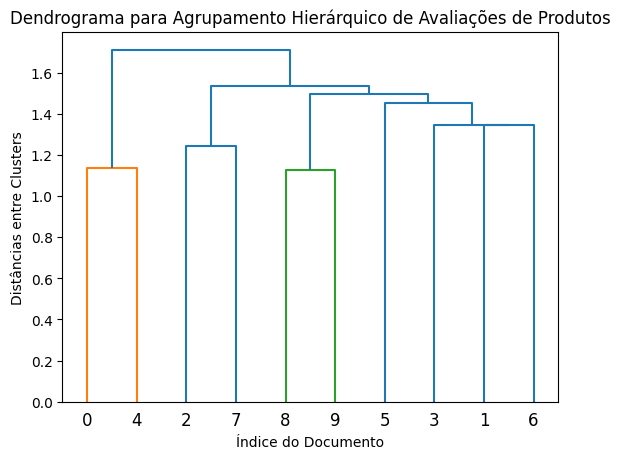

In [5]:
# =========================================================
# Funções para normalizar os dados
# =========================================================
import pandas as pd
import spacy
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer

nlp = spacy.load("pt_core_news_sm", disable=['parser', 'ner'])
stemmer = nltk.stem.RSLPStemmer()

def remove_stopwords(text):
    # Remove stopwords
    stop_words = [word for word in nlp.Defaults.stop_words]
    cleaned_text = " ".join([i for i in text if i not in set(stop_words)])
    return cleaned_text

def clean_text(text):
    # Aplica a remoção de stopwords, caracteres não alfabéticos e outras palavras curtas
    df_corpus = []
    for i in range(len(text)):
        df_c = re.sub('[^A-Za-záàâãéèêíïóôõöúçñÁÀÂÃÉÈÍÏÓÔÕÖÚÇÑ]', ' ', text[i]).lower().split()
        df_corpus.append(df_c)

    df_corpus= pd.Series(df_corpus).apply(lambda x: ' '.join([w for w in x if len(w)>2]))
    corpus = [remove_stopwords(r.split()) for r in df_corpus]
    return corpus

def lemmatization(texto):
    # Extrai o lema das palavras
    global nlp
    output = []
    for sent in texto:
        doc = nlp(" ".join(sent))
        output.append([token.lemma_ for token in doc])

    return output

def lemmatize(text):
    # Aplica a limpeza do texto e a lemmatização
    token = lemmatization(pd.Series(clean_text(text)).apply(lambda x: x.split()))
    token_lemma = []
    for i in range(len(token)):
        token_lemma.append(' '.join(token[i]))

    return token_lemma

# =========================================================
# Avaliações de produtos
# =========================================================
documents = [
"Este é o melhor smartphone que já tive. A bateria dura o dia todo e a câmera é incrível!",
"O produto chegou danificado e o atendimento ao cliente foi terrível. Não recomendo.",
"A qualidade do som deste fone de ouvido é surpreendente. Estou muito satisfeito.",
"O design do produto é elegante e moderno. Fiquei impressionado com a aparência.",
"A entrega foi super rápida. Recebi meu pedido no dia seguinte. Ótimo serviço!",
"Esse tablet é perfeito para assistir a filmes. A tela é grande e nítida.",
"Infelizmente, o produto não atendeu às minhas expectativas. A funcionalidade é limitada.",
"Estou muito feliz com a compra. O preço foi ótimo e o produto é de alta qualidade.",
"A configuração do produto foi fácil e intuitiva. Não tive problemas para usá-lo.",
"O produto é compacto e fácil de transportar. Ideal para viagens."]

# Normalização
corpus = lemmatize(documents)

tfidf_vectorized = TfidfVectorizer(min_df=1, max_df=0.85, analyzer='word', use_idf=True)
features = tfidf_vectorized.fit_transform(corpus)
model_lexicon = tfidf_vectorized.get_feature_names_out()
feature_vectors = features.toarray()

# =========================================================
# Matriz de Similaridade e Dendograma Hierárquico
# =========================================================

from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from matplotlib import pyplot as plt

# Similarity matrix computation
similarity_matrix = cosine_similarity(feature_vectors)

Z = linkage(similarity_matrix, method='ward')
dendrogram(Z)
plt.title("Dendrograma para Agrupamento Hierárquico de Avaliações de Produtos")
plt.xlabel("Índice do Documento")
plt.ylabel("Distâncias entre Clusters")
plt.show()

Os documentos em cada cluster tem características semelhantes.

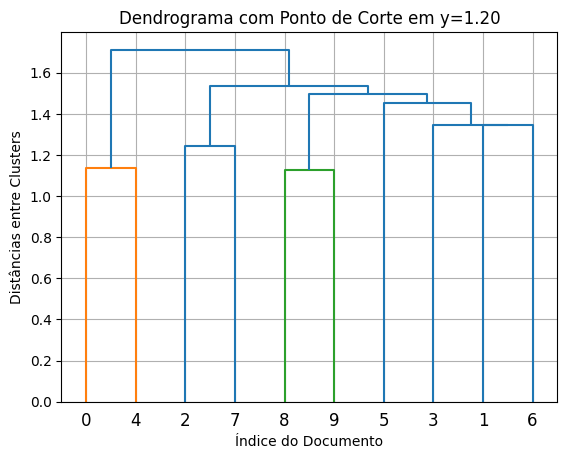

In [6]:
dendrogram(Z, color_threshold=1.20)
plt.title("Dendrograma com Ponto de Corte em y=1.20")
plt.xlabel("Índice do Documento")
plt.ylabel("Distâncias entre Clusters")
plt.grid()
plt.show()

Com ponto de corte em 1.20 teríamos apenas três clusters, ou seja, quanto mais alto o ponto de corte, menos clusters serão formados, e quanto mais baixo, mais clusters serão criados.

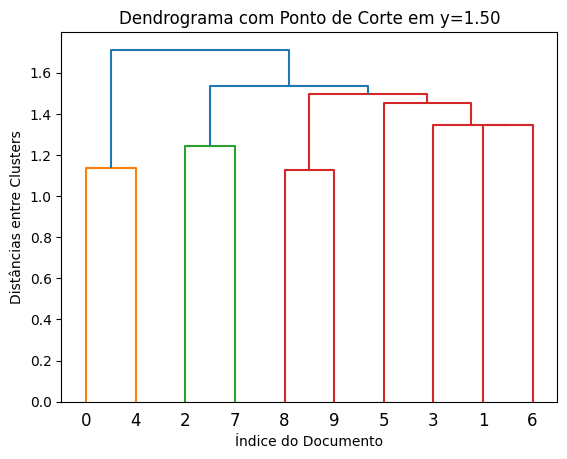

In [7]:
dendrogram(Z, color_threshold=1.5)
plt.title("Dendrograma com Ponto de Corte em y=1.50")
plt.xlabel("Índice do Documento")
plt.ylabel("Distâncias entre Clusters")
plt.show()

In [8]:
# =========================================================
# Saída
# =========================================================
max_dist = 1.5
cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['Cluster Label'])
corpus_df = pd.DataFrame({"Document": documents})
final_table = pd.concat([corpus_df, cluster_labels], axis=1)

final_table

,Document,Cluster Label
0,Este é o melhor smartphone que já tive. A bate...,1
1,O produto chegou danificado e o atendimento ao...,3
2,A qualidade do som deste fone de ouvido é surp...,2
3,O design do produto é elegante e moderno. Fiqu...,3
4,A entrega foi super rápida. Recebi meu pedido ...,1
5,Esse tablet é perfeito para assistir a filmes....,3
6,"Infelizmente, o produto não atendeu às minhas ...",3
7,Estou muito feliz com a compra. O preço foi ót...,2
8,A configuração do produto foi fácil e intuitiv...,3
9,O produto é compacto e fácil de transportar. I...,3


4. (PP.3.4) Demonstre a modelagem de tópicos, com LDA, utilizando alguns documentos representativos de revisões de produtos. Efetue todas as etapas de pré-processamento adequadas antes de efetuar a modelagem. 

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from pandas import DataFrame

# Exemplo de documentos representativos de revisões de produtos
documents = ["Gostamos muito da comida, realmente deliciosa.",
             "A comida não estava boa; o gosto não agradou.",
             "O vestido estava muito apertado e não coube.",
             "O vestido está na medida certa e coube bem.",
             "O celular está muito danificado"]

# Pré-processamento: Tokenização, remoção de stop words e stemming
stop_words = set(stopwords.words('portuguese'))
stop_words.remove('não')
ps = PorterStemmer()

print('=='*32)
print(stop_words)
print('=='*32)

def preprocess(text):
    # Tokenização e conversão para minúsculas
    tokens = word_tokenize(text.lower())  
    # Stemming
    tokens = [ps.stem(token) for token in tokens if token.isalnum()]
    # Remoção de stop words  
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Aplicar pré-processamento aos documentos
documents_preprocessed = [preprocess(doc) for doc in documents]


# TF-IDF (Avaliação da importancia de palavras / frequencia em um documento)
tfidf_vectorized = TfidfVectorizer(min_df=0., max_df=1., norm='l2', use_idf=True)
features = tfidf_vectorized.fit_transform(documents_preprocessed)
model_lexicon = tfidf_vectorized.get_feature_names_out()


# Modelagem de tópicos usando LDA (atribuição de topicos com probabilidade)
lda = LatentDirichletAllocation(n_components=3, max_iter=1000, random_state=0)
dt_matrix = lda.fit_transform(features)


# Exibição dos resultados
topic_features = DataFrame(dt_matrix, columns=["topic 1", "topic 2", "topic 3"])
print("Matriz de Distribuição de Tópicos:")
print(topic_features)


# Exibição dos tópicos mais importantes
vocab = model_lexicon
topic_matrix = lda.components_
for topic_weights in topic_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.3]  # Ajuste do limiar de importância
    print("Tópico:")
    print(topic)
    print()

{'houvermos', 'mesmo', 'nós', 'estes', 'também', 'como', 'num', 'esses', 'somos', 'fôramos', 'pelo', 'mais', 'tivermos', 'estava', 'das', 'aquela', 'dos', 'ser', 'está', 'de', 'seus', 'houverem', 'tem', 'tive', 'elas', 'estive', 'depois', 'eram', 'houveríamos', 'estiveram', 'se', 'fora', 'meus', 'em', 'estiverem', 'numa', 'fosse', 'no', 'seriam', 'tivesse', 'estão', 'sejamos', 'houvéssemos', 'sua', 'aquelas', 'por', 'estou', 'minhas', 'ele', 'terão', 'meu', 'a', 'qual', 'tínhamos', 'eu', 'teremos', 'vocês', 'serão', 'houve', 'houvera', 'isto', 'lhe', 'as', 'me', 'seu', 'até', 'tua', 'quando', 'às', 'fui', 'fomos', 'nossas', 'estar', 'estejam', 'para', 'seremos', 'houvemos', 'sem', 'na', 'tinham', 'teus', 'tiverem', 'seria', 'formos', 'tenho', 'esta', 'deles', 'um', 'tinha', 'tivéssemos', 'uma', 'os', 'havemos', 'tenhamos', 'aos', 'eles', 'estivéssemos', 'será', 'hão', 'quem', 'tu', 'tivemos', 'estiver', 'lhes', 'nosso', 'só', 'serei', 'tivéramos', 'tiveram', 'tiver', 'com', 'há', 'esti